In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import time
warnings.filterwarnings('ignore')

# Auto Regression Moving Average Model

References: https://people.cs.pitt.edu/~milos/courses/cs3750/lectures/class16.pdf,
           https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d

In [2]:
# read data
Weekly_df = pd.read_csv("Dataset\\Week_Death_Vac_2Y.csv")

In [3]:
display(Weekly_df)

,Date,Weekly Deaths,Weekly Cases,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
0,2021-01-06,19312,1605482,3.7,0.6,0.0,14273599,12135244,0.0
1,2021-01-13,23376,1708055,5.4,0.9,0.0,21400606,17887626,0.0
2,2021-01-20,21554,1377786,7.5,1.6,0.0,30659826,24752625,0.0
3,2021-01-27,22568,1140548,9.5,2.6,0.0,41078104,31568602,0.0
4,2021-02-03,21188,954622,11.6,4.1,0.0,53260886,38576199,0.0
...,...,...,...,...,...,...,...,...,...
88,2022-09-14,3230,471611,79.6,67.9,48.7,618116882,264176559,36.0
89,2022-09-21,3158,395071,79.7,68.0,48.8,622068616,264564363,37.1
90,2022-09-28,2974,342162,79.8,68.1,48.9,626055729,264942526,38.3
91,2022-10-05,2994,309887,79.9,68.2,49.1,630145435,265329365,39.6


In [4]:
Death_df = Weekly_df[['Date', 'Weekly Deaths']]
Cases_df = Weekly_df[['Date', 'Weekly Cases']]

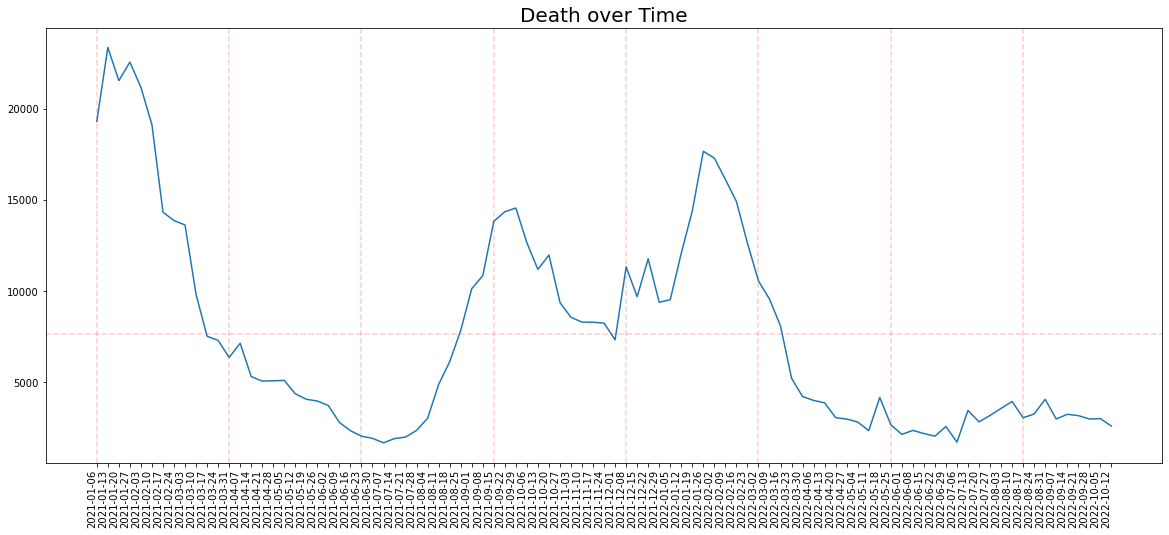

In [5]:
plt.figure(figsize = (20,8))
plt.plot(Death_df['Date'], Death_df['Weekly Deaths'])
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(Death_df), 12):
    plt.axvline(Death_df['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(Death_df['Weekly Deaths'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Death over Time", fontsize = 20)
plt.show()

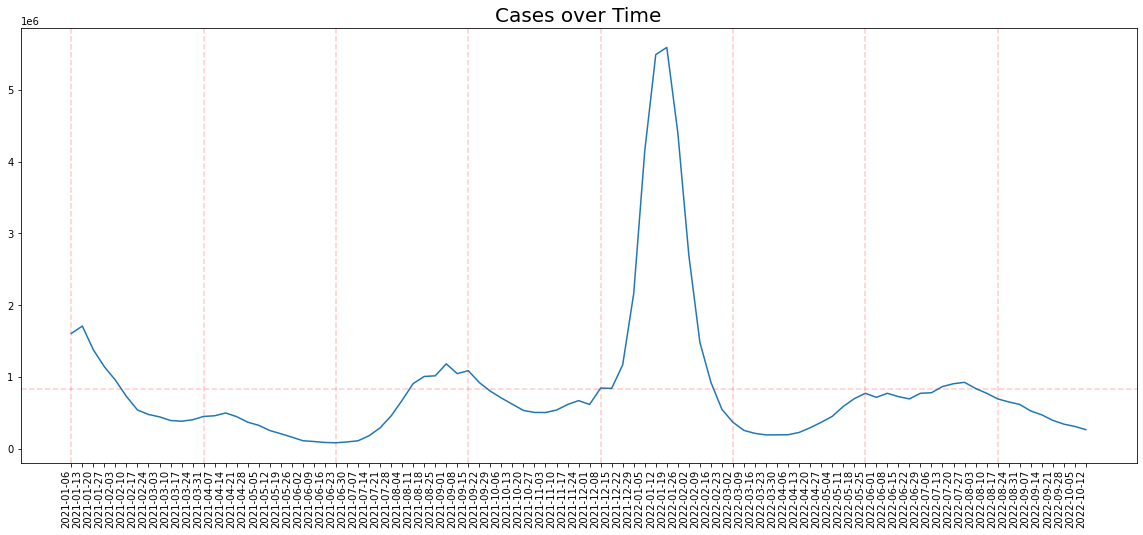

In [6]:
plt.figure(figsize = (20,8))
plt.plot(Cases_df['Date'], Cases_df['Weekly Cases'])
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(Cases_df), 12):
    plt.axvline(Cases_df['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(Cases_df['Weekly Cases'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Cases over Time", fontsize = 20)
plt.show()

## Differencing
We can observe a trend with time series hence we will difference the dataset

In [7]:
first_diff_death = Death_df.copy()
first_diff_death['Weekly Deaths'] = Death_df['Weekly Deaths'].diff()
second_diff_death = first_diff_death.copy()
second_diff_death['Weekly Deaths'] = first_diff_death['Weekly Deaths'].diff()
third_diff_death = second_diff_death.copy()
third_diff_death['Weekly Deaths'] = second_diff_death['Weekly Deaths'].diff()
fourth_diff_death = third_diff_death.copy()
fourth_diff_death['Weekly Deaths'] = third_diff_death['Weekly Deaths'].diff()

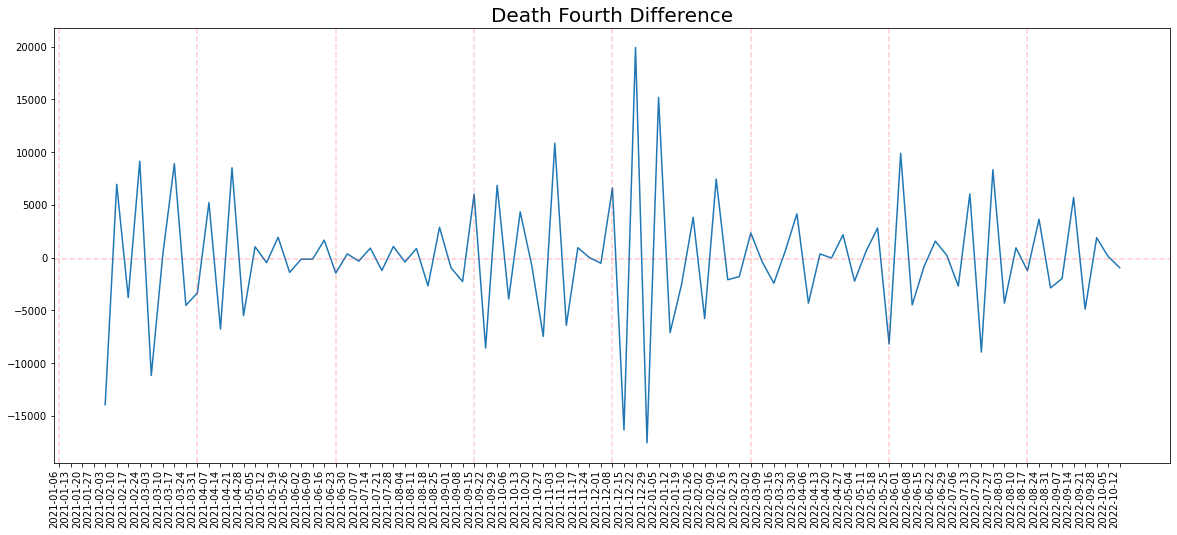

In [8]:
plt.figure(figsize = (20,8))
plt.plot(fourth_diff_death['Date'], fourth_diff_death['Weekly Deaths'])
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(fourth_diff_death), 12):
    plt.axvline(fourth_diff_death['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(fourth_diff_death['Weekly Deaths'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Death Fourth Difference", fontsize = 20)
plt.show()

In [9]:
first_diff_case = Cases_df.copy()
first_diff_case['Weekly Cases'] = Cases_df['Weekly Cases'].diff()

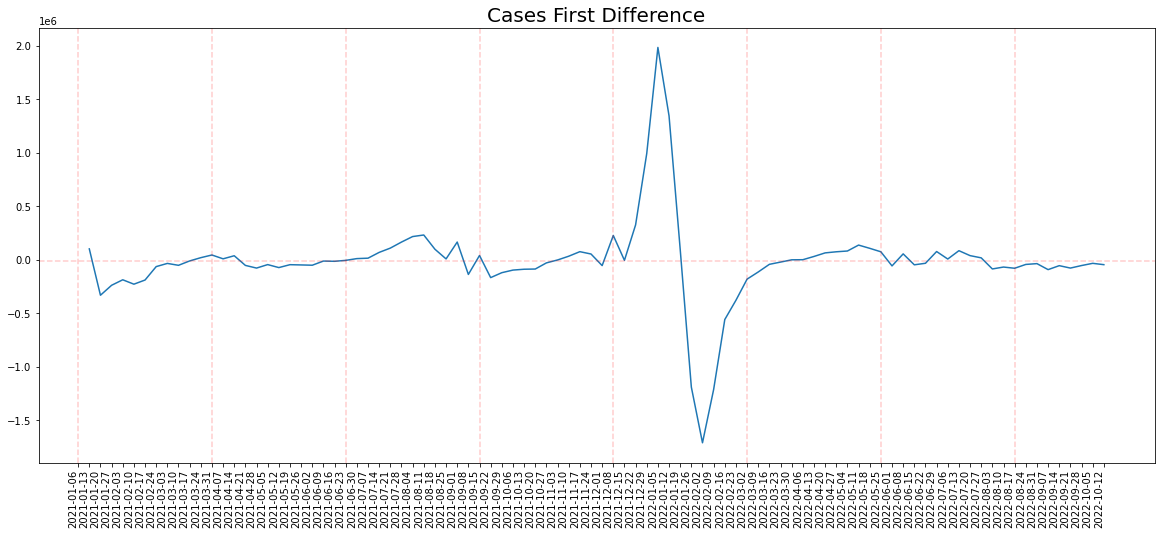

In [10]:
plt.figure(figsize = (20,8))
plt.plot(first_diff_case['Date'], first_diff_case['Weekly Cases'])
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(first_diff_case), 12):
    plt.axvline(first_diff_case['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(first_diff_case['Weekly Cases'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Cases First Difference", fontsize = 20)
plt.show()

## Train Test Split

In [11]:
Death_Train, Death_Test = train_test_split(fourth_diff_death.dropna(), test_size = 0.25, shuffle = False)
Cases_Train, Cases_Test = train_test_split(first_diff_case.dropna(), test_size = 0.25, shuffle = False)

In [12]:
display(Death_Train)
display(Death_Test)
display(Cases_Train)
display(Cases_Test)

,Date,Weekly Deaths
4,2021-02-03,-13952.0
5,2021-02-10,6948.0
6,2021-02-17,-3786.0
7,2021-02-24,9145.0
8,2021-03-03,-11180.0
...,...,...
65,2022-04-06,-4318.0
66,2022-04-13,351.0
67,2022-04-20,-37.0
68,2022-04-27,2166.0


,Date,Weekly Deaths
70,2022-05-11,606.0
71,2022-05-18,2811.0
72,2022-05-25,-8197.0
73,2022-06-01,9880.0
74,2022-06-08,-4489.0
75,2022-06-15,-931.0
76,2022-06-22,1564.0
77,2022-06-29,222.0
78,2022-07-06,-2700.0
79,2022-07-13,6042.0


,Date,Weekly Cases
1,2021-01-13,102573.0
2,2021-01-20,-330269.0
3,2021-01-27,-237238.0
4,2021-02-03,-185926.0
5,2021-02-10,-227011.0
...,...,...
65,2022-04-06,1554.0
66,2022-04-13,31912.0
67,2022-04-20,65257.0
68,2022-04-27,75584.0


,Date,Weekly Cases
70,2022-05-11,138193.0
71,2022-05-18,107980.0
72,2022-05-25,75588.0
73,2022-06-01,-56257.0
74,2022-06-08,55972.0
75,2022-06-15,-46069.0
76,2022-06-22,-31792.0
77,2022-06-29,77996.0
78,2022-07-06,7927.0
79,2022-07-13,85874.0


## ACF and PACF

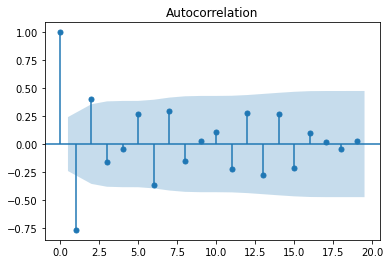

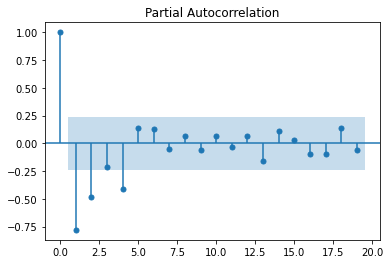

In [13]:
# For Death Weekly
plot_acf(Death_Train["Weekly Deaths"]);
plot_pacf(Death_Train["Weekly Deaths"]);

From ACF and PACF of second difference of death, we should use ARMA(5,3) process.

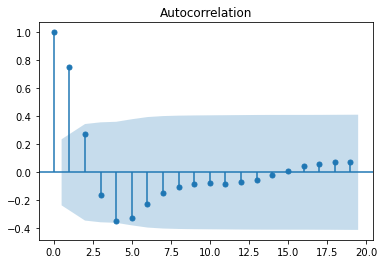

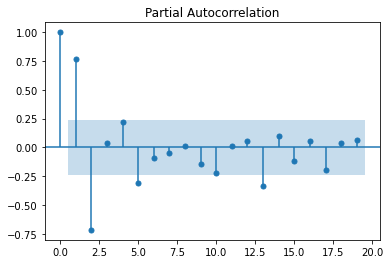

In [14]:
# For Cases Weekly
plot_acf(Cases_Train["Weekly Cases"]);
plot_pacf(Cases_Train["Weekly Cases"]);

From ACF and PACF of second difference of death, we should use ARMA(3,2) process.

## ARMA Model for Weekly Deaths

In [15]:
# define model
model = ARMA(Death_Train.drop(["Date"], axis = 1), order=(5,3))

#fit the model
model_fit = model.fit()

#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          Weekly Deaths   No. Observations:                   66
Model:                     ARMA(5, 3)   Log Likelihood                -639.292
Method:                       css-mle   S.D. of innovations           3724.896
Date:                Mon, 29 May 2023   AIC                           1298.584
Time:                        23:16:09   BIC                           1320.480
Sample:                             0   HQIC                          1307.236
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -143.6283        nan        nan        nan         nan         nan
ar.L1.Weekly Deaths    -0.7808      0.001   -879.296      0.000      -0.783      -0.779
ar.L2.Weekly Dea

In [16]:
#get the predictions and residuals
predictions = model_fit.predict(start = Death_Test.index[0] - 4, end = Death_Test.index[-1] -4)
predictions.index += 4
residuals = Death_Test["Weekly Deaths"] - predictions

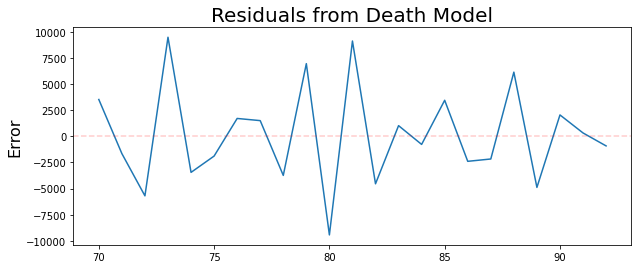

In [17]:
# Plot Residual graph
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from Death Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Root Mean Squared Error: 4678.019888874773


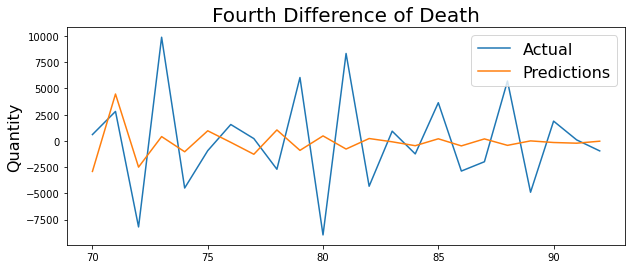

In [18]:
plt.figure(figsize=(10,4))

plt.plot(Death_Test["Weekly Deaths"])
plt.plot(predictions)
plt.legend(('Actual', 'Predictions'), fontsize=16)
plt.title('Fourth Difference of Death', fontsize=20)
plt.ylabel('Quantity', fontsize=16)
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

## ARMA Model for Weekly Cases

In [19]:
# define model
model = ARMA(Cases_Train.drop(["Date"], axis = 1), order=(3,2))

#fit the model
model_fit = model.fit()

#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:           Weekly Cases   No. Observations:                   69
Model:                     ARMA(3, 2)   Log Likelihood                -943.315
Method:                       css-mle   S.D. of innovations         205820.965
Date:                Mon, 29 May 2023   AIC                           1900.629
Time:                        23:16:09   BIC                           1916.268
Sample:                             0   HQIC                          1906.834
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.674e+04   6.93e+04     -0.242      0.809   -1.53e+05    1.19e+05
ar.L1.Weekly Cases     0.5154      0.293      1.756      0.079      -0.060       1.091
ar.L2.Weekly Cases  

In [20]:
#get the predictions and residuals
predictions = model_fit.predict(start = Cases_Test.index[0] - 1, end = Cases_Test.index[-1] - 1)
predictions.index += 1
residuals = Cases_Test["Weekly Cases"] - predictions

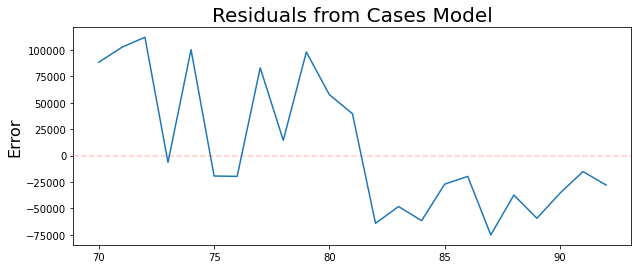

In [21]:
# Plot Residual graph
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from Cases Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)


Root Mean Squared Error: 61635.86410755704


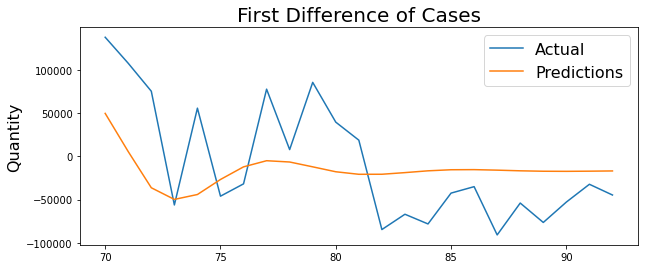

In [22]:
plt.figure(figsize=(10,4))

plt.plot(Cases_Test["Weekly Cases"])
plt.plot(predictions)
plt.legend(('Actual', 'Predictions'), fontsize=16)
plt.title('First Difference of Cases', fontsize=20)
plt.ylabel('Quantity', fontsize=16)
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

# Arma Results

In [23]:
# define model
model = ARMA(second_diff_death.dropna().drop(["Date"], axis = 1), order=(5,3))

#fit the model
model_fit = model.fit()

#get the predictions and residuals
start_pred = second_diff_death.index[-1] - 2
predictions = model_fit.predict(start = start_pred, end = start_pred + 3)
predictions.index += 2

#Merge with Death dataframe
Forecast_Death = [Death_df["Weekly Deaths"].iloc[-1]]
Forecast_Death[1:] = predictions
Forecast_Death = pd.DataFrame(Forecast_Death, columns = ['Weekly Deaths']).cumsum()
Forecast_Death = round(Forecast_Death.reset_index(drop = True))

temp_date = []
for i in range (0,5):
    date = np.datetime64(Death_df["Date"].iloc[-1])
    date = date + np.timedelta64(7 * i, 'D')
    temp_date.append(pd.to_datetime(date).strftime('%Y-%m-%d'))
temp_date = pd.DataFrame(temp_date, columns = ['date'])
Forecast_Death['Date'] = temp_date['date']

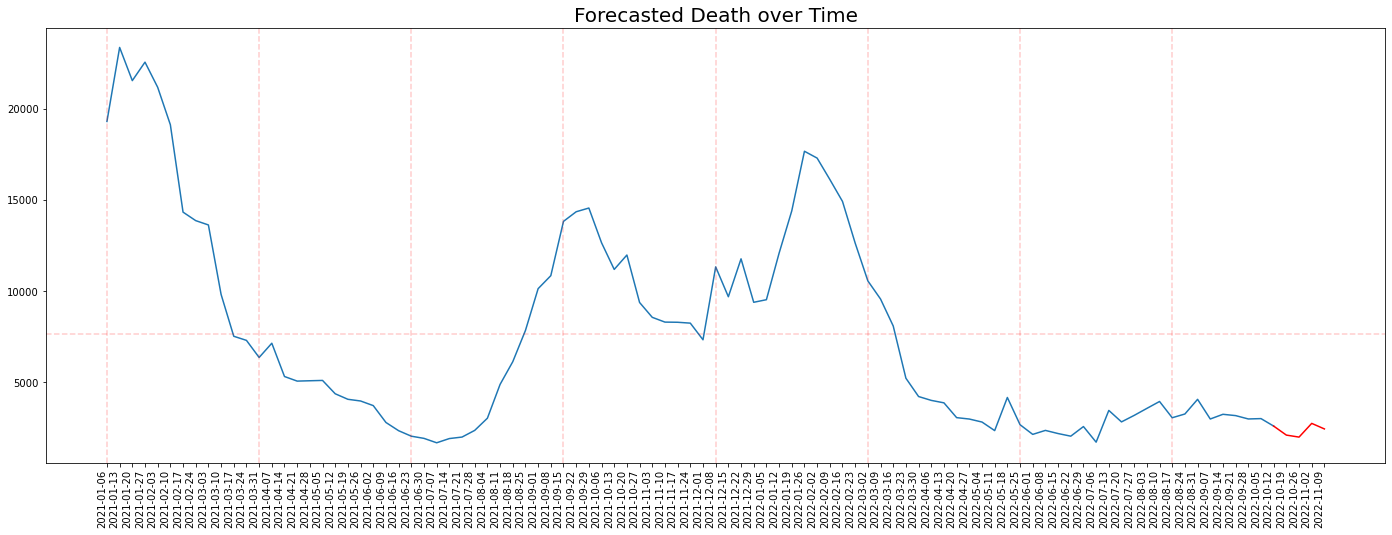

In [24]:
#Plot the forecasted result from ARMA
plt.figure(figsize = (24,8))
plt.plot(Death_df['Date'], Death_df['Weekly Deaths'])
plt.plot(Forecast_Death['Date'], Forecast_Death['Weekly Deaths'], color = 'red')
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(Death_df), 12):
    plt.axvline(Death_df['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(Death_df['Weekly Deaths'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Forecasted Death over Time", fontsize = 20)
plt.show()

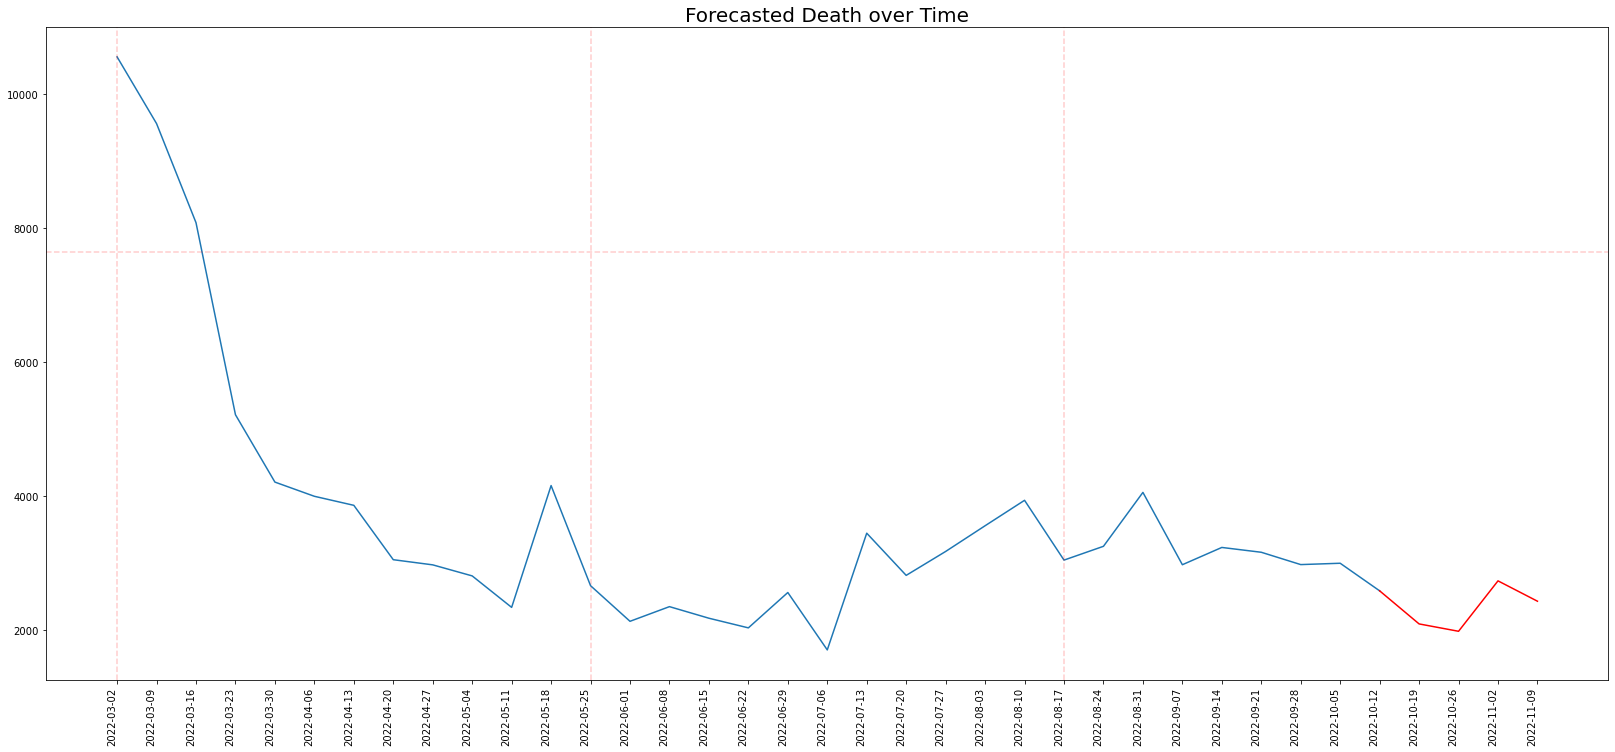

In [25]:
#enlarged plot
plt.figure(figsize = (28,12))
plt.plot(Death_df.iloc[60:,:]['Date'], Death_df.iloc[60:,:]['Weekly Deaths'])
plt.plot(Forecast_Death['Date'], Forecast_Death['Weekly Deaths'], color = 'red')
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(Death_df.iloc[60:,:]), 12):
    plt.axvline(Death_df.iloc[60:,:].reset_index()['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(Death_df['Weekly Deaths'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Forecasted Death over Time", fontsize = 20)
plt.show()

In [26]:
# define model
model = ARMA(first_diff_case.dropna().drop(["Date"], axis = 1), order=(3,2))

#fit the model
model_fit = model.fit()

#get the predictions and residuals
start_pred = first_diff_case.index[-1] - 1
predictions = model_fit.predict(start = start_pred, end = start_pred + 3)
predictions.index += 1

#Merge with Death dataframe
Forecast_Case = [Cases_df["Weekly Cases"].iloc[-1]]
Forecast_Case[1:] = predictions
Forecast_Case = pd.DataFrame(Forecast_Case, columns = ['Weekly Cases']).cumsum()
Forecast_Case = Forecast_Case.reset_index(drop = True)

temp_date = []
for i in range (0,5):
    date = np.datetime64(Death_df["Date"].iloc[-1])
    date = date + np.timedelta64(7 * i, 'D')
    temp_date.append(pd.to_datetime(date).strftime('%Y-%m-%d'))
temp_date = pd.DataFrame(temp_date, columns = ['date'])
Forecast_Case['Date'] = temp_date['date']

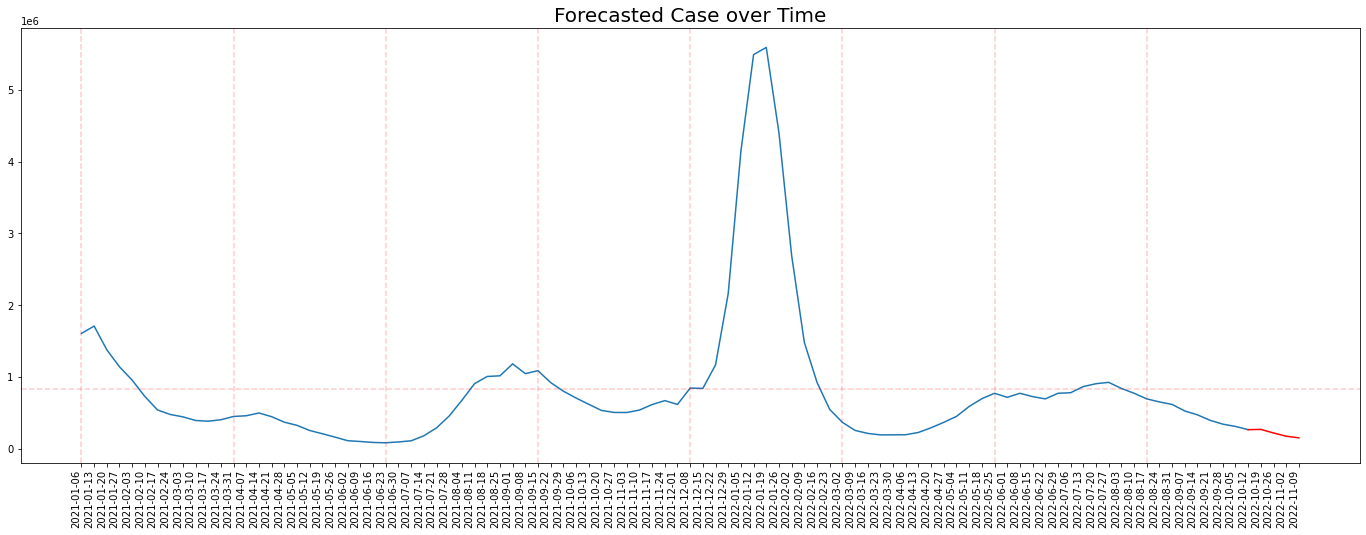

In [27]:
#Plot the forecasted result from ARMA
plt.figure(figsize = (24,8))
plt.plot(Cases_df['Date'], Cases_df['Weekly Cases'])
plt.plot(Forecast_Case['Date'], Forecast_Case['Weekly Cases'], color = 'red')
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(Cases_df), 12):
    plt.axvline(Cases_df['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(Cases_df['Weekly Cases'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Forecasted Case over Time", fontsize = 20)
plt.show()

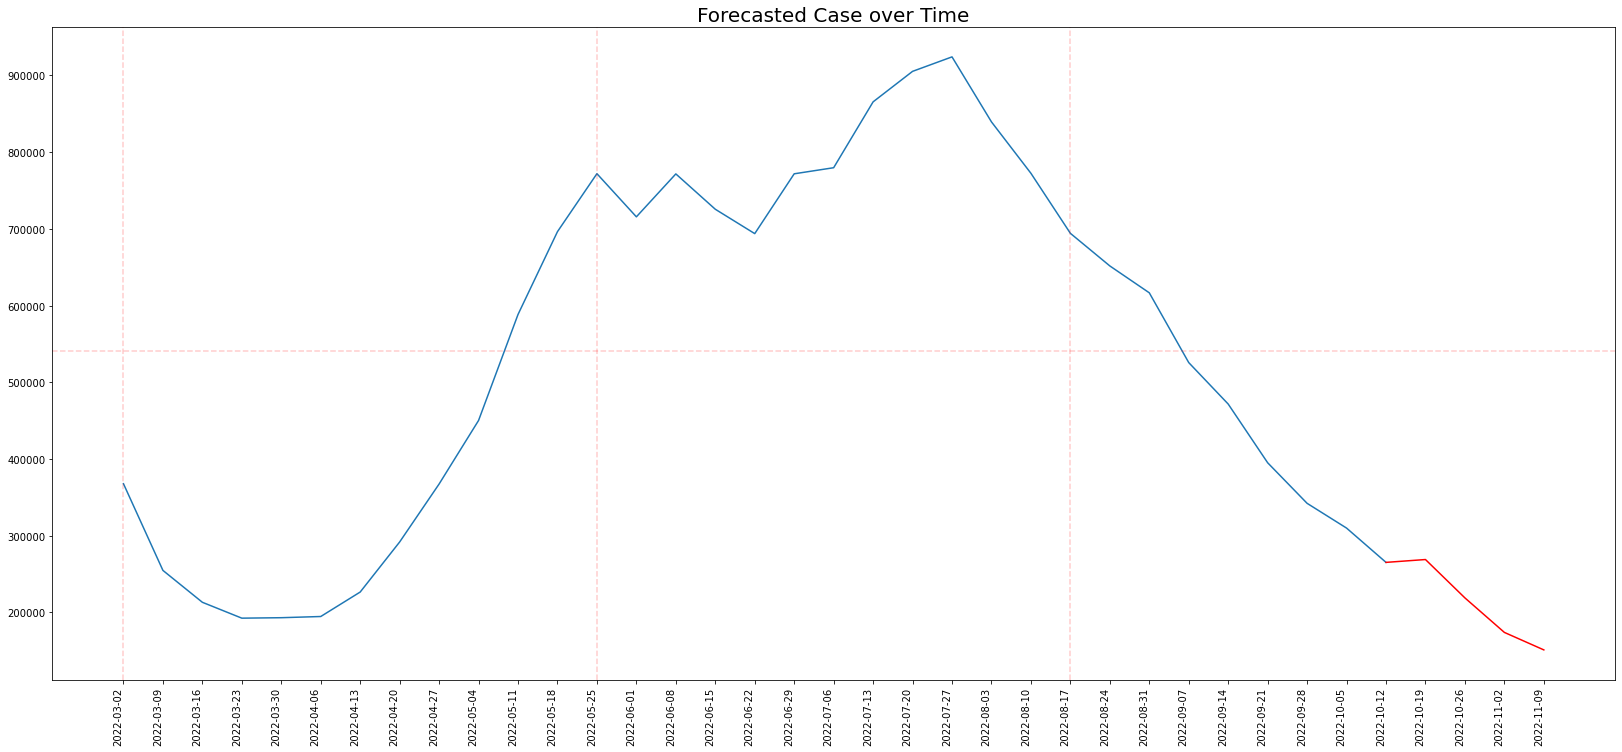

In [28]:
#enlarged plot
plt.figure(figsize = (28,12))
plt.plot(Cases_df.iloc[60:,:]['Date'], Cases_df.iloc[60:,:]['Weekly Cases'])
plt.plot(Forecast_Case['Date'], Forecast_Case['Weekly Cases'], color = 'red')
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(Cases_df.iloc[60:,:]), 12):
    plt.axvline(Cases_df.iloc[60:,:].reset_index()['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(Cases_df.iloc[60:,:]['Weekly Cases'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Forecasted Case over Time", fontsize = 20)
plt.show()

# Delta Analysis
As of May 2023

In [29]:
#read the new data as of 2023
Updated_Weekly_df = pd.read_csv("Dataset\\data_weekly_death_trends_2023.csv")
display(Updated_Weekly_df)

,Date,Weekly Deaths,Geography,Comment
0,2020-01-08,1,United States,Jan 11 2020
1,2020-01-15,2,United States,Jan 18 2020
2,2020-01-22,3,United States,Jan 25 2020
3,2020-01-29,0,United States,Feb 1 2020
4,2020-02-05,4,United States,Feb 8 2020
...,...,...,...,...
171,2023-04-19,1132,United States,Apr 22 2023
172,2023-04-26,949,United States,Apr 29 2023
173,2023-05-03,778,United States,May 6 2023
174,2023-05-10,570,United States,May 13 2023


In [30]:
#extract relevant date that was forecasted from udpated data table
Updated_Weekly_df = Updated_Weekly_df.loc[Updated_Weekly_df['Date'].isin(temp_date['date'])].reset_index()
Updated_Weekly_df.at[0, 'Weekly Deaths'] = Death_df['Weekly Deaths'].iat[-1]
display(Updated_Weekly_df)

,index,Date,Weekly Deaths,Geography,Comment
0,144,2022-10-12,2582,United States,Oct 15 2022
1,145,2022-10-19,2187,United States,Oct 22 2022
2,146,2022-10-26,2240,United States,Oct 29 2022
3,147,2022-11-02,2242,United States,Nov 5 2022
4,148,2022-11-09,2192,United States,Nov 12 2022


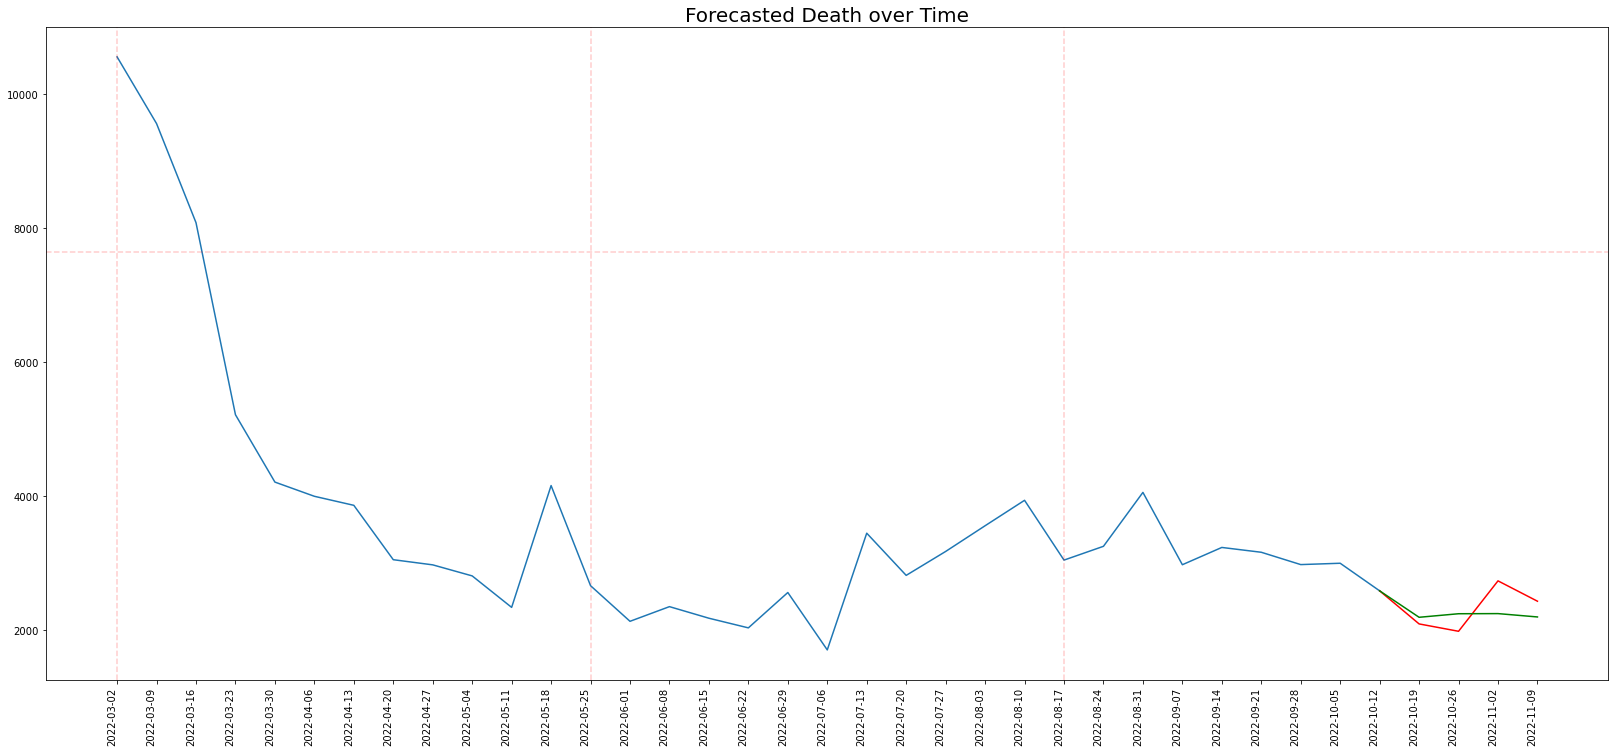

In [31]:
#Predicted vs Actual Value
plt.figure(figsize = (28,12))
plt.plot(Death_df.iloc[60:,:]['Date'], Death_df.iloc[60:,:]['Weekly Deaths'])
plt.plot(Forecast_Death['Date'], Forecast_Death['Weekly Deaths'], color = 'red')
plt.plot(Updated_Weekly_df['Date'], Updated_Weekly_df['Weekly Deaths'], color = 'green')
plt.xticks(rotation=90, ha="right")
for quarter in range(0, len(Death_df.iloc[60:,:]), 12):
    plt.axvline(Death_df.iloc[60:,:].reset_index()['Date'][quarter], color='r', linestyle='--', alpha=0.2)
plt.axhline(Death_df['Weekly Deaths'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("Forecasted Death over Time", fontsize = 20)
plt.show()

In [32]:
display(Forecast_Death)

,Weekly Deaths,Date
0,2582.0,2022-10-12
1,2088.0,2022-10-19
2,1978.0,2022-10-26
3,2731.0,2022-11-02
4,2427.0,2022-11-09


In [33]:
Actual_Death = Updated_Weekly_df[['Weekly Deaths', 'Date']]
display(Actual_Death)

,Weekly Deaths,Date
0,2582,2022-10-12
1,2187,2022-10-19
2,2240,2022-10-26
3,2242,2022-11-02
4,2192,2022-11-09


In [34]:
Percent_diff = pd.DataFrame()
Percent_diff['Percent Deaths'] = ((Forecast_Death['Weekly Deaths'] - Actual_Death['Weekly Deaths'])*100/Actual_Death['Weekly Deaths']).values
Percent_diff['Date'] = Actual_Death['Date']

In [35]:
display(Percent_diff)

,Percent Deaths,Date
0,0.000000,2022-10-12
1,-4.526749,2022-10-19
2,-11.696429,2022-10-26
3,21.810883,2022-11-02
4,10.720803,2022-11-09


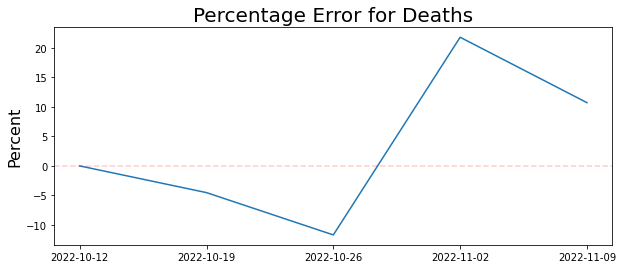

In [36]:
# Plot percentage error graph
plt.figure(figsize=(10,4))
plt.plot(Percent_diff['Date'], Percent_diff['Percent Deaths'])
plt.title('Percentage Error for Deaths', fontsize=20)
plt.ylabel('Percent', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [37]:
# Mean Absolute Percentage Error (MAPE)
MAPE = abs(Percent_diff['Percent Deaths']).sum()
MAPE /= 4
print(f'Man Absolute Percentage Error: {MAPE:.2f}%')

Man Absolute Percentage Error: 12.19%
